# EE634 HW1 
### Kutay Ugurlu

In [55]:
import numpy as np 
from scipy.fft import fft, fft2, ifft2, fftshift
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
from numpy import pi as pi 


## Q1a

$$x(n_1,n_2) = \begin{bmatrix} 1 & 1\\  1 & 1 \end{bmatrix}$$
$$x\ast h(n_1,n_2) = \begin{bmatrix} 0 & \frac{1}{4} & \frac{1}{4} & 0 \\  \frac{1}{4} & 1 & 1 & \frac{1}{4} \\ \frac{1}{4} & 1 & 1 & \frac{1}{4} \\ 0 & \frac{1}{4} & \frac{1}{4} & 0 \end{bmatrix}$$

Using the linear convolutions dimension expression one can conclude that the filter is $3\times 3$. So let $$h(-n_1,-n_2) = \begin{bmatrix} a & b & c \\  d & e & f \\ g & h & i \end{bmatrix}$$ 

Using the corner elements, one can deduce that the corner elements of the filter is 0. 
With this configuration: 
* $i = 0$
* $h + i = \frac{1}{4} \implies h = \frac{1}{4}$
* $g + h = \frac{1}{4} \implies g = 0$
* $f + i = \frac{1}{4} \implies f = \frac{1}{4}$
* $e + h + f + i = 1 \implies e = \frac{1}{2}$
* $d + g + e + h = 1 \implies d = \frac{1}{4}$ <br/> $\vdots$

By using the symmetry in input and output, one can also conclude that: <br/>
* $a = c = 0$
* b = $\frac{1}{4}$

<br/>

Hence $$h(n_1,n_2) = \begin{bmatrix} 0 & \frac{1}{4} & 0 \\  \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\ 0 & \frac{1}{4} & 0 \end{bmatrix}$$



Resultant convolution matches the given.


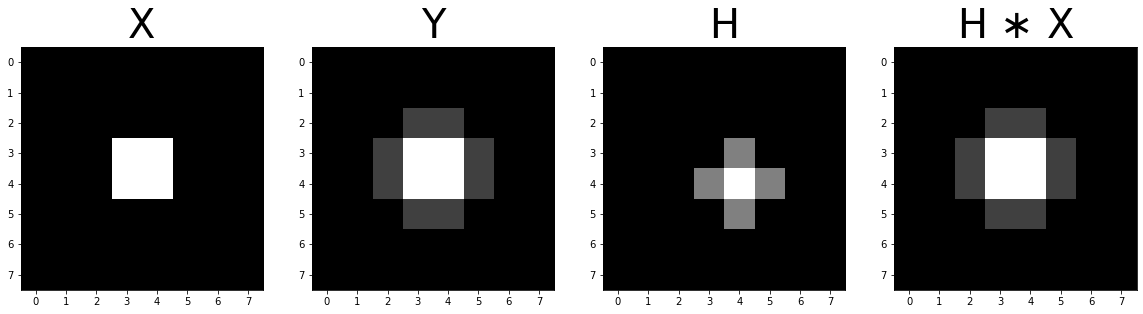

In [52]:
x = np.zeros((8,8))
x[3:5,3:5] = 1
y = np.zeros_like(x)
y[2:6,2:6] = np.array([[0,.25,.25,0],[.25,1,1,.25],[.25,1,1,.25],[0,.25,.25,0]])
h = np.zeros_like(x)
h[3:6,3:6] = np.array([[0,.25,0],[.25,.5,.25],[0,.25,0]])
y_prime = np.abs(fftshift(ifft2(fft2(x)*fft2(h))))
fsize = 40
plt.figure(figsize=(20,80))
plt.subplot(1,4,1)
plt.imshow(np.abs(x))
plt.title('X',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,2)
plt.imshow(np.abs(y))
plt.title('Y',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,3)
plt.imshow(np.abs(h))
plt.title('H',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,4)
plt.imshow(y_prime)
plt.title(r'H $\ast$ X',fontsize=fsize)
plt.set_cmap(cmap="gray")
assert np.isclose(np.sum(y_prime-y),0)
print("Resultant convolution matches the given.")

# Q1b

In [7]:
H = h[3:6,3:6]
H

array([[0.  , 0.25, 0.  ],
       [0.25, 0.5 , 0.25],
       [0.  , 0.25, 0.  ]])

In [37]:
u = np.linalg.svd(H)
singular_values = u[1]
singular_values

array([6.83012702e-01, 1.83012702e-01, 1.27795495e-17])

## As can be seen above, we have 3 distinct singular values for the convolution kernel. For a kernel to be separable, it should be expressed as one outer product. However, when we use the SVD to decompose the matrix into outer products, we see that it has two nonzero singular values. One separable filter example can be seen below. The kernel is defined as an outer product and it has only one nonzero singular value. 

[1.83500000e+04 4.99795260e-13 1.52124936e-13]


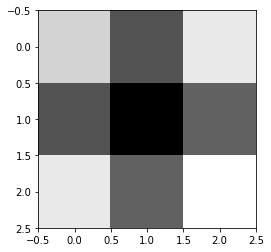

In [47]:
a = np.random.randint(0,100,(3,1))
b = np.outer(a,a)
u = np.linalg.svd(b)
singular_values = u[1]
print(singular_values)
plt.imshow(b)

# Q1c

$\begin{align} 
H(w_1,w_2) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-jw_1n_1} e^{-jw_2n_2} \\ 
 &= \frac{1}{4}(e^{-jw_1}+e^{-jw_2}+e^{-jw_1}e^{-j2w_2}+e^{-j2w_1}e^{-jw_2}) + \frac{1}{4}(e^{-jw_1}e^{-jw_2}) \nonumber\\
 &= \frac{1}{4}e^{-jw_1}(1+e^{-j2w_2}) + \frac{1}{4}e^{-jw_2}(1+e^{-j2w_1}) + \frac{1}{2}(e^{-jw_1}e^{-jw_2}) \nonumber\\
 &= \frac{1}{4}e^{-jw_1}e^{-jw_2}(cos(\frac{w_1}{2})+cos(\frac{w_2}{2})) + \frac{1}{2} e^{-jw_1}e^{-jw_2} \nonumber\\
\end{align}$
$$\implies |H(w1,w2)| = \frac{1}{2} + cos(\frac{w_1}{2})+cos(\frac{w_2}{2})$$
<br/> This filter acts as low pass filter, since its magnitude have higher values around the origin. 

# Q2c
$\begin{align} 
H(k_1,k_2) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi}{N_1}}k_1n_1} e^{-j{\frac{2\pi}{N_2}}k_2n_2} \\ 
\end{align}$
<br/> Since image has n1-n2 symmetry, its DFT has k1-k2 symmetry in the frequency domain, _i.e._ $H(k_1,k_2) = H(k_2,k_1)$

$\begin{align} 
H(0,0) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2)  = 1.5 \tag{1}\\ 
H(1,0) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi n_1}{3}}} \tag{2}\\ 
&= (h(0,1)+h(0,2)+h(0,3)) + (h(1,0)+h(1,1)+h(1,2))e^{-j\frac{2\pi}{3}} + (h(2,1)+h(2,2)+h(3,2))e^{-j\frac{4\pi}{3}} \nonumber\\
&= \frac{1}{4} + e^{-j\frac{2\pi}{3}} + \frac{1}{4}e^{-j\frac{4\pi}{3}} \nonumber\\
H(0,1) &= H(1,0) \tag{3}\\
H(2,0) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{4\pi n_1}{3}}} \tag{4}\\ 
&= (h(0,1)+h(0,2)+h(0,3)) + (h(1,0)+h(1,1)+h(1,2))e^{-j\frac{4\pi}{3}} + (h(2,1)+h(2,2)+h(3,2))e^{-j\frac{8\pi}{3}} \nonumber\\
&= \frac{1}{4} + e^{-j\frac{4\pi}{3}} + \frac{1}{4}e^{-j\frac{2\pi}{3}} \nonumber\\
H(0,2) &= H(2,0) \tag{5}\\
H(1,1) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi (n_1+n_2)}{3}}} \tag{6}\\ 
&= \sum\limits_{n_2=0}^2 e^{-j{\frac{2\pi}{3}}}  \left( h(0,n_2) + h(1,n_2) e^{-j{\frac{2\pi}{3}}} + h(2,n_2) e^{-j{\frac{4\pi}{3}}} \right) \nonumber \\
H(2,2) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi (2n_1+2n_2)}{3}}} \tag{7}\\ 
&= \sum\limits_{n_2=0}^2 e^{-j{\frac{4\pi}{3}}}  \left( h(0,n_2) + h(1,n_2) e^{-j{\frac{2\pi}{3}}} + h(2,n_2) e^{-j{\frac{4\pi}{3}}} \right) \nonumber \\
&= 
\end{align}$


In [48]:
fft2(H)

array([[ 1.5  -0.j        , -0.375-0.64951905j, -0.375+0.64951905j],
       [-0.375-0.64951905j,  0.   +0.j        ,  0.   -0.j        ],
       [-0.375+0.64951905j,  0.   +0.j        ,  0.   -0.j        ]])

In [57]:
(0.25 + 1*np.exp(-1j*4*pi/3) + 0.25*np.exp(-1j*2*pi/3))

(-0.3750000000000004+0.6495190528383288j)